In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import tempfile
import tensorflow as tf

from tf_rl.controller import DiscreteDeepQ
from tf_rl.simulation import KarpathyGame
from tf_rl import simulate
from tf_rl.models import MLP

from __future__ import print_function

In [5]:
LOG_DIR = tempfile.mkdtemp()
print(LOG_DIR)

/tmp/tmpK4C_he


In [15]:
current_settings = {
    'objects': [
        'friend',
        'enemy',
         'boss'
    ],
    'colors': {
        'hero':   'yellow',
        'friend': 'green',
        'enemy':  'red',
         'boss':   'orange',
    },
    'object_reward': {
        'friend': 0.1,
        'enemy': -0.1,
        'boss':  -0.5,
    },
    'hero_bounces_off_walls': False,
    'world_size': (700,500),
    'hero_initial_position': [400, 300],
    'hero_initial_speed':    [0,   0],
    "maximum_speed":         [50, 50],
    "object_radius": 10.0,
    "num_objects": {
        "friend" : 25,
        "enemy" :  25,
        "boss" :   5,
    },
    "num_observation_lines" : 32,
    "observation_line_length": 120.,
    "tolerable_distance_to_wall": 50,
    "wall_distance_penalty":  -0.0,
    "delta_v": 50
}

In [16]:
# create the game simulator
g = KarpathyGame(current_settings)

In [20]:
tf.ops.reset_default_graph()
session = tf.InteractiveSession()


journalist = tf.train.SummaryWriter(LOG_DIR)

# brain maps from observation to action q values. Here it is a simple mlp
brain = MLP([g.observation_size,], [100, 100, g.num_actions], 
            [tf.tanh, tf.tanh, tf.identity])
# solver over brian - here simple sgd
optimizer = tf.train.RMSPropOptimizer(learning_rate= 0.0001, decay=0.9)

# DeepQ object
current_controller = DiscreteDeepQ(g.observation_size, g.num_actions, brain, optimizer, session,
                           discount_rate=0.9, exploration_period=5000, max_experience=10000, summary_writer=journalist)
session.run(tf.initialize_all_variables())
journalist.add_graph(session.graph_def)

Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f2fc8652610>> ignored


In [19]:
# UNCOMMENT FOR WSAD CONTROL (requires redis server to be running, commands can be sent from terminal)
# from human_control import HumanController
# current_controller = HumanController({b"w": 3, b"d": 0, b"s": 1,b"a": 2,}) 

In [24]:
# THE LINE BELOW IS FOR FAST LEARNING
# FPS, SPEED, RES = 1, 4.5, 0.1
# THE LINE BELOW IS FOR REAL TIME VISUALIZATION
FPS, SPEED, RES = 30, 1., 0.03

simulate(g, current_controller, fps = FPS,
         simulation_resultion=RES,
         actions_per_game_second=10,
         speed=SPEED,
         store_every_nth=4,
         train_every_nth=4,
         save_path="my_sim")

<tf_rl.utils.svg.Scene instance at 0x7f2f99de07a0>

KeyboardInterrupt: 

# Average Reward over time

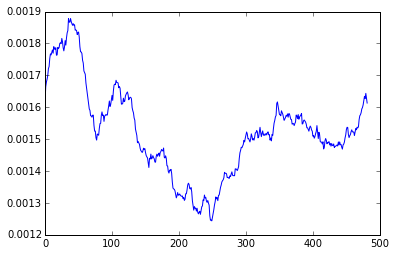

In [25]:
g.plot_reward(smoothing=100)

# Visualizing what the agent is seeing

Starting with the ray pointing all the way right, we have one row per ray in clockwise order.
The numbers for each ray are the following:
- first three numbers are normalized distances to the closest visible (intersecting with the ray) object. If no object is visible then all of them are $1$. If there's many objects in sight, then only the closest one is visible. The numbers represent distance to friend, enemy and wall in order.
- the last two numbers represent the speed of moving object (x and y components). Speed of wall is ... zero.

Finally the last two numbers in the representation correspond to speed of the hero.

In [112]:
g.__class__ = KarpathyGame
np.set_printoptions(formatter={'float': (lambda x: '%.2f' % (x,))})
x = g.observe()
new_shape = (x[:-2].shape[0]//g.eye_observation_size, g.eye_observation_size)
print(x[:-2].reshape(new_shape))
print(x[-2:])
g.to_html()

[[1.00 0.55 1.00 0.49 -0.66]
 [1.00 1.00 1.00 0.00 0.00]
 [1.00 1.00 1.00 0.00 0.00]
 [0.34 1.00 1.00 0.18 0.01]
 [0.34 1.00 1.00 0.18 0.01]
 [1.00 1.00 1.00 0.00 0.00]
 [1.00 1.00 1.00 0.00 0.00]
 [1.00 1.00 1.00 0.00 0.00]
 [1.00 1.00 1.00 0.00 0.00]
 [1.00 1.00 0.22 0.00 0.00]
 [1.00 1.00 0.11 0.00 0.00]
 [1.00 1.00 0.08 0.00 0.00]
 [1.00 1.00 0.06 0.00 0.00]
 [1.00 1.00 0.05 0.00 0.00]
 [1.00 1.00 0.05 0.00 0.00]
 [1.00 1.00 0.04 0.00 0.00]
 [1.00 1.00 0.04 0.00 0.00]
 [1.00 1.00 0.04 0.00 0.00]
 [1.00 1.00 0.05 0.00 0.00]
 [1.00 1.00 0.05 0.00 0.00]
 [1.00 1.00 0.06 0.00 0.00]
 [1.00 1.00 0.08 0.00 0.00]
 [1.00 1.00 0.11 0.00 0.00]
 [1.00 1.00 0.22 0.00 0.00]
 [1.00 1.00 1.00 0.00 0.00]
 [0.77 1.00 1.00 -0.65 -0.11]
 [1.00 1.00 1.00 0.00 0.00]
 [1.00 1.00 1.00 0.00 0.00]
 [1.00 1.00 1.00 0.00 0.00]
 [1.00 1.00 1.00 0.00 0.00]
 [1.00 1.00 1.00 0.00 0.00]
 [1.00 0.54 1.00 0.49 -0.66]]
[0.00 0.11]


In [34]:
h = g.to_html()

In [35]:
with open("siema.svg", "w") as s:
    h.write_svg(s)